In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cities = np.random.randint(1, 25, size=(10, 2))
cities

array([[13,  9],
       [ 6,  9],
       [13, 12],
       [ 9, 14],
       [10, 20],
       [ 7,  7],
       [23,  7],
       [ 9, 13],
       [11,  7],
       [12, 19]])

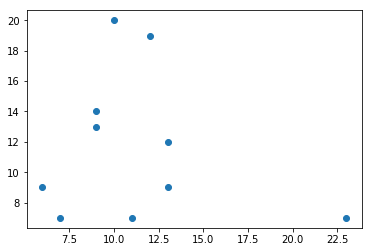

In [3]:
plt.scatter(cities[:, 0], cities[:, 1])
plt.show()

In [4]:
def D_matrix(city_location):
    city_num = city_location.shape[0]
    D = np.zeros((city_num, city_num))
    for i in range(city_num):
        for j in range(city_num):
            distance = np.sqrt(np.square(city_location[i, 0] - city_location[j, 0]) + np.square(city_location[i, 1] - city_location[j, 1]))
            D[i, j] = distance
    return(D)
D = D_matrix(cities)
Distance_Matrix = pd.DataFrame(D)
Distance_Matrix

,0,1,2,3,4,5,6,7,8,9
0,0.000000,7.000000,3.000000,6.403124,11.401754,6.324555,10.198039,5.656854,2.828427,10.049876
1,7.000000,0.000000,7.615773,5.830952,11.704700,2.236068,17.117243,5.000000,5.385165,11.661904
2,3.000000,7.615773,0.000000,4.472136,8.544004,7.810250,11.180340,4.123106,5.385165,7.071068
3,6.403124,5.830952,4.472136,0.000000,6.082763,7.280110,15.652476,1.000000,7.280110,5.830952
4,11.401754,11.704700,8.544004,6.082763,0.000000,13.341664,18.384776,7.071068,13.038405,2.236068
5,6.324555,2.236068,7.810250,7.280110,13.341664,0.000000,16.000000,6.324555,4.000000,13.000000
6,10.198039,17.117243,11.180340,15.652476,18.384776,16.000000,0.000000,15.231546,12.000000,16.278821
7,5.656854,5.000000,4.123106,1.000000,7.071068,6.324555,15.231546,0.000000,6.324555,6.708204
8,2.828427,5.385165,5.385165,7.280110,13.038405,4.000000,12.000000,6.324555,0.000000,12.041595
9,10.049876,11.661904,7.071068,5.830952,2.236068,13.000000,16.278821,6.708204,12.041595,0.000000


In [5]:
city_num = 10
def I(i):
    if i + 1 > city_num - 1:
        return(i - 1, 0)
    elif i - 1 < 0:
        return(city_num - 1, i + 1)
    else:
        return(i - 1, i + 1)

In [6]:
K = np.random.random((city_num, city_num))
pd.DataFrame(K)

,0,1,2,3,4,5,6,7,8,9
0,0.177548,0.488122,0.577933,0.324827,0.205025,0.022783,0.242235,0.083706,0.328365,0.954400
1,0.148466,0.184114,0.072851,0.550751,0.650451,0.871028,0.780362,0.853915,0.950605,0.815133
2,0.015349,0.264863,0.580634,0.818072,0.354336,0.047753,0.206546,0.729696,0.914702,0.809284
3,0.135087,0.250191,0.955946,0.001657,0.648207,0.464468,0.658524,0.247044,0.456314,0.913400
4,0.922557,0.034927,0.958830,0.941362,0.962706,0.946396,0.747911,0.995432,0.818727,0.913180
5,0.954169,0.864695,0.228490,0.771300,0.127302,0.207813,0.511673,0.737959,0.228819,0.487369
6,0.926974,0.702704,0.810988,0.780235,0.245910,0.598939,0.930137,0.298579,0.803967,0.865852
7,0.612775,0.171640,0.878430,0.378808,0.910201,0.497542,0.556490,0.568488,0.834158,0.509631
8,0.703340,0.288807,0.561668,0.702535,0.871508,0.869900,0.749834,0.891494,0.896307,0.450563
9,0.695313,0.160131,0.196562,0.265533,0.904304,0.604762,0.807718,0.070005,0.662562,0.487168


In [35]:
V = np.copy(K)
dp = D.max() * 2
T = 0.5
dp

36.76955262170047

In [39]:
E = 0
for X in range(city_num):
    Uxi_exp_accum = 0
    Uxi_ls = []
    for i in range(city_num):
        cstr = 0
        dist = 0
        # calculate Uxi
        for Y in range(city_num):
            if Y != X:
                cstr += V[Y, i]
                dist += D[X, Y] * (V[Y, I(i)[0]] + V[Y, I(i)[1]])
        Uxi = - dp * cstr - dist
        
        Uxi_ls.append(Uxi)
        Uxi_exp_accum += np.exp(Uxi / T)
    # update Vxi
    for i in range(city_num):
        V[X, i] = np.exp(Uxi_ls[i] / T) / Uxi_exp_accum
        
        # calculate E
        E += - V[X, i] * Uxi_ls[i]
E

140.00872651458829

In [40]:
visitation = pd.DataFrame(np.round(V)).astype(int)
visitation

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0


In [33]:
def tour(V_matrix):
    tour_matrix = np.round(V_matrix).astype(int)
    city_ix = np.where(tour_matrix == 1)[0]
    path_ix = np.where(tour_matrix == 1)[1]
    path = []
    for i in range(city_num):
        path.append(cities[int(city_ix[np.where(path_ix == i)])])
    path = np.array(path)
    return(path)
path = tour(V)
path

array([[11,  7],
       [ 6,  9],
       [ 7,  7],
       [13, 12],
       [12, 19],
       [ 9, 14],
       [ 9, 13],
       [10, 20],
       [13,  9],
       [23,  7]])

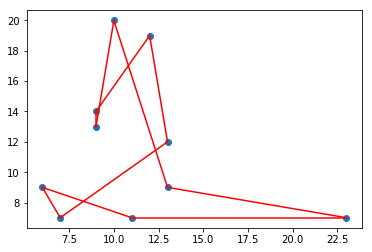

In [41]:
def draw_tour(tour):
    plt.scatter(cities[:, 0], cities[:, 1])
    for i in range(city_num):
        plt.plot([tour[i][0], tour[I(i)[1]][0]], [tour[i][1], tour[I(i)[1]][1]], color='red')
    plt.show()
draw_tour(path)